# **Importing Packages**

Make sure to install the packages before importing if needed.

In [3]:
import scanpy as sc
import anndata as ad
import numpy as np
import pandas as pd
import igraph
import leidenalg

# **Loading Data**

To see requirements for all AnnData objects (CELLxCELL): https://github.com/chanzuckerberg/single-cell-curation/blob/main/schema/7.0.0/schema.md.

In [4]:
## Emplacement pour elodie 
adata = sc.read_h5ad("/Users/elodiehusson/Desktop/AD & PD/77k_AD_PD_CTRL.h5ad")

## Path Yara 
# adata = sc.read_h5ad("C:/Users/yarad/Desktop/x/Masters/Master BMC - Sorbonne/M2/Single Cell/Project/Coding Project/77k_AD_PD_CTRL.h5ad")

# ajoutez vos emplacements ici du fichier, et juste mettez en commentaires les autres
# adata = sc.read_h5ad(".../.../subset_AD_PD_CTRL.h5ad")

The studied conditions are the following:

In [5]:
adata.obs.groupby(["disease", "AD_status", "Parkinson_disease"]).size()

/var/folders/k4/d0pwylgd1tl4mf2_hqnm6l400000gn/T/ipykernel_39999/2862628901.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  adata.obs.groupby(["disease", "AD_status", "Parkinson_disease"]).size()


disease                        AD_status  Parkinson_disease
dementia || Alzheimer disease  No         No                       0
                                          Yes                      0
                               Yes        No                   31949
                                          Yes                      0
dementia || Parkinson disease  No         No                       0
                                          Yes                   7772
                               Yes        No                       0
                                          Yes                      0
normal                         No         No                   37331
                                          Yes                      0
                               Yes        No                       0
                                          Yes                      0
dtype: int64

## **Reduced Dataset's Metadata**

scanpy shows a structured summary:

In [6]:
adata

AnnData object with n_obs × n_vars = 77052 × 34176
    obs: 'Source', 'n_genes', 'n_counts', 'class', 'subclass', 'subtype', 'tissue_ontology_term_id', 'tissue_type', 'assay_ontology_term_id', 'cell_type_ontology_term_id', 'self_reported_ethnicity_ontology_term_id', 'development_stage_ontology_term_id', 'sex_ontology_term_id', 'donor_id', 'suspension_type', 'is_primary_data', 'AD_status', 'DLBD_status', 'FTD_status', 'Tauopathy_status', 'Vascular_status', 'ASCVD_status', 'Schizophrenia', 'Bipolar_Disorder', 'Parkinson_disease', 'Tardive_dyskinesia', 'genetic_ancestry', 'disease_ontology_term_id', 'cell_type', 'assay', 'disease', 'sex', 'tissue', 'self_reported_ethnicity', 'development_stage', 'observation_joinid'
    var: 'gene_name', 'n_cells', 'feature_is_filtered', 'feature_name', 'feature_reference', 'feature_biotype', 'feature_length', 'feature_type'
    uns: 'batch_condition', 'citation', 'class_colors', 'genome', 'organism', 'organism_ontology_term_id', 'schema_reference', 'sche

In [7]:
# This is the sparse matrix
print("adata.X type is :",type(adata.X))

print(adata.X[:5, :5])

adata.X type is : <class 'scipy.sparse._csr.csr_matrix'>
<Compressed Sparse Row sparse matrix of dtype 'float32'
	with 3 stored elements and shape (5, 5)>
  Coords	Values
  (0, 2)	1.0
  (4, 2)	3.0
  (4, 4)	1.0


In [8]:
print(f"The variable adata has the following shape: {adata.shape}.")
print(f"There are {adata.shape[0]} cells and {adata.shape[1]} genes in this dataset.")

The variable adata has the following shape: (77052, 34176).
There are 77052 cells and 34176 genes in this dataset.


In [9]:
donors_per_disease = pd.crosstab(adata.obs["donor_id"],adata.obs["disease"])
donors_per_disease_summary = donors_per_disease.sum()

print("Number of donors per disease status:")
print(donors_per_disease_summary)

Number of donors per disease status:
disease
dementia || Alzheimer disease    31949
dementia || Parkinson disease     7772
normal                           37331
dtype: int64


In [10]:
print("The keys of adata.obs are the following:", adata.obs.keys())

adata.obs.head()

The keys of adata.obs are the following: Index(['Source', 'n_genes', 'n_counts', 'class', 'subclass', 'subtype',
       'tissue_ontology_term_id', 'tissue_type', 'assay_ontology_term_id',
       'cell_type_ontology_term_id',
       'self_reported_ethnicity_ontology_term_id',
       'development_stage_ontology_term_id', 'sex_ontology_term_id',
       'donor_id', 'suspension_type', 'is_primary_data', 'AD_status',
       'DLBD_status', 'FTD_status', 'Tauopathy_status', 'Vascular_status',
       'ASCVD_status', 'Schizophrenia', 'Bipolar_Disorder',
       'Parkinson_disease', 'Tardive_dyskinesia', 'genetic_ancestry',
       'disease_ontology_term_id', 'cell_type', 'assay', 'disease', 'sex',
       'tissue', 'self_reported_ethnicity', 'development_stage',
       'observation_joinid'],
      dtype='object')


Source  n_genes  n_counts  class subclass  \
barcodekey                                                                  
Donor_333-1-GTCTGTCGTTCTCCTG-1       R     3117    6236.0  Oligo    Oligo   
Donor_1001-1-ACTTTGTGTTACCGTA-1      R     1026    1444.0  Astro    Astro   
Donor_638-1-ACCCTTGTCCTTTAGT-0       R     3025    6086.0   Endo     Endo   
Donor_865-1-TGTGAGTAGAAAGTCT-0       R     3142    6582.0  Astro    Astro   
Donor_865-1-AGATGCTAGTCTTCCC-0       R     6149   27425.0     IN   IN_SST   

                                      subtype tissue_ontology_term_id  \
barcodekey                                                              
Donor_333-1-GTCTGTCGTTCTCCTG-1   Oligo_OPALIN          UBERON:0009834   
Donor_1001-1-ACTTTGTGTTACCGTA-1    Astro_WIF1          UBERON:0009834   
Donor_638-1-ACCCTTGTCCTTTAGT-0     Endo_IL1R1          UBERON:0009834   
Donor_865-1-TGTGAGTAGAAAGTCT-0   Astro_PLSCR1          UBERON:0009834   
Donor_865-1-AGATGCTAGTCTTCCC-0   IN_SST_EDNRA          UBERON:0009834   

                                tissue_type assay_ontology_term_id  \
barcodekey                                                           
Donor_333-1-GTCTGTCGTTCTCCTG-1       tissue            EFO:0009922   
Donor_1001-1-ACTTTGTGTTACCGTA-1      tissue            EFO:0009922   
Donor_638-1-ACCCTTGTCCTTTAGT-0       tissue            EFO:0009922   
Donor_865-1-TGTGAGTAGAAAGTCT-0       tissue            EFO:0009922   
Donor_865-1-AGATGCTAGTCTTCCC-0       tissue            EFO:0009922   

                                cell_type_ontology_term_id  ...  \
barcodekey                                                  ...   
Donor_333-1-GTCTGTCGTTCTCCTG-1                  CL:0000128  ...   
Donor_1001-1-ACTTTGTGTTACCGTA-1                 CL:0000127  ...   
Donor_638-1-ACCCTTGTCCTTTAGT-0                  CL:0000115  ...   
Donor_865-1-TGTGAGTAGAAAGTCT-0                  CL:0000127  ...   
Donor_865-1-AGATGCTAGTCTTCCC-0                  CL:4023017  ...   

                                genetic_ancestry  \
barcodekey                                         
Donor_333-1-GTCTGTCGTTCTCCTG-1        East Asian   
Donor_1001-1-ACTTTGTGTTACCGTA-1            Asian   
Donor_638-1-ACCCTTGTCCTTTAGT-0        East Asian   
Donor_865-1-TGTGAGTAGAAAGTCT-0        East Asian   
Donor_865-1-AGATGCTAGTCTTCCC-0        East Asian   

                                       disease_ontology_term_id  \
barcodekey                                                        
Donor_333-1-GTCTGTCGTTCTCCTG-1   MONDO:0001627 || MONDO:0004975   
Donor_1001-1-ACTTTGTGTTACCGTA-1  MONDO:0001627 || MONDO:0004975   
Donor_638-1-ACCCTTGTCCTTTAGT-0   MONDO:0001627 || MONDO:0004975   
Donor_865-1-TGTGAGTAGAAAGTCT-0   MONDO:0001627 || MONDO:0004975   
Donor_865-1-AGATGCTAGTCTTCCC-0   MONDO:0001627 || MONDO:0004975   

                                                          cell_type  \
barcodekey                                                            
Donor_333-1-GTCTGTCGTTCTCCTG-1                      oligodendrocyte   
Donor_1001-1-ACTTTGTGTTACCGTA-1                           astrocyte   
Donor_638-1-ACCCTTGTCCTTTAGT-0                     endothelial cell   
Donor_865-1-TGTGAGTAGAAAGTCT-0                            astrocyte   
Donor_865-1-AGATGCTAGTCTTCCC-0   sst GABAergic cortical interneuron   

                                     assay                        disease  \
barcodekey                                                                  
Donor_333-1-GTCTGTCGTTCTCCTG-1   10x 3' v3  dementia || Alzheimer disease   
Donor_1001-1-ACTTTGTGTTACCGTA-1  10x 3' v3  dementia || Alzheimer disease   
Donor_638-1-ACCCTTGTCCTTTAGT-0   10x 3' v3  dementia || Alzheimer disease   
Donor_865-1-TGTGAGTAGAAAGTCT-0   10x 3' v3  dementia || Alzheimer disease   
Donor_865-1-AGATGCTAGTCTTCCC-0   10x 3' v3  dementia || Alzheimer disease   

                                    sex                          tissue  \
barcodekey                                                             

In [11]:
print("Donor Names : \n", adata.obs_names)

print("Gene Names : \n", adata.var_names) # These are Ensembl IDs

Donor Names : 
 Index(['Donor_333-1-GTCTGTCGTTCTCCTG-1', 'Donor_1001-1-ACTTTGTGTTACCGTA-1',
       'Donor_638-1-ACCCTTGTCCTTTAGT-0', 'Donor_865-1-TGTGAGTAGAAAGTCT-0',
       'Donor_865-1-AGATGCTAGTCTTCCC-0', 'Donor_1007-1-GCCCAGATCAAAGACA-0',
       'Donor_865-2-GTAGAAAAGAATTGTG-1', 'Donor_1001-1-TTGTTCACACGCACCA-1',
       'Donor_638-2-CTTTCGGAGAAACTAC-1', 'Donor_31-1-GGGACTCAGGTAGTAT-0',
       ...
       'Donor_721-1-TTGGGCGAGATGACCG-0', 'Donor_634-2-CAGATCATCACTCCGT-0',
       'Donor_735-2-AGATGCTCAAGTGACG-1', 'Donor_1278-1-GACCAATTCTCGTCAC-0',
       'Donor_634-2-TACCTGCCAGAGTAAT-0', 'Donor_735-1-CCTCTCCAGCAACCAG-0',
       'Donor_1278-1-CATTCCGCAGCTGTCG-0', 'Donor_721-2-CACTTCGGTAGTCTGT-1',
       'Donor_634-2-ACGATCATCATGAAAG-0', 'Donor_721-1-AAGCGAGCAGCGTACC-0'],
      dtype='object', name='barcodekey', length=77052)
Gene Names : 
 Index(['ENSG00000000003', 'ENSG00000000005', 'ENSG00000000419',
       'ENSG00000000457', 'ENSG00000000460', 'ENSG00000000938',
       'ENSG00000000

In [12]:
disease_list = list(adata.obs["disease"].cat.categories)

print("The types of disease in this dataset are :", disease_list)

The types of disease in this dataset are : ['dementia || Alzheimer disease', 'dementia || Parkinson disease', 'normal']


The number of cells per disease type in this dataset:

In [13]:
for disease_type in disease_list : 

    print(len(adata.obs["disease"][adata.obs["disease"] == disease_type]), " cells :", disease_type)

31949  cells : dementia || Alzheimer disease
7772  cells : dementia || Parkinson disease
37331  cells : normal


Gene metadata:

In [14]:
print("adata.var.keys :", adata.var.keys())

print("First 5 rows from adata.var:")
print(adata.var.head(5))

adata.var.keys : Index(['gene_name', 'n_cells', 'feature_is_filtered', 'feature_name',
       'feature_reference', 'feature_biotype', 'feature_length',
       'feature_type'],
      dtype='object')
First 5 rows from adata.var:
                gene_name  n_cells  feature_is_filtered feature_name  \
ENSG00000000003    TSPAN6   256237                False       TSPAN6   
ENSG00000000005      TNMD    21369                False         TNMD   
ENSG00000000419      DPM1  3001206                False         DPM1   
ENSG00000000457     SCYL3  1941205                False        SCYL3   
ENSG00000000460  C1orf112  1798664                False        FIRRM   

                feature_reference feature_biotype feature_length  \
ENSG00000000003    NCBITaxon:9606            gene           2396   
ENSG00000000005    NCBITaxon:9606            gene            873   
ENSG00000000419    NCBITaxon:9606            gene           1262   
ENSG00000000457    NCBITaxon:9606            gene           2916   


#### **Existing Embeddings**
It would be interesting and informative to compare existing embeddings to our results.

In [15]:
# Embeddings (UMAP, PCA...)
print("adata.obsm.keys :", adata.obsm.keys())

# Other information
print("adata.uns.keys :", adata.uns.keys())

adata.obsm.keys : KeysView(AxisArrays with keys: X_umap)
adata.uns.keys : dict_keys(['batch_condition', 'citation', 'class_colors', 'genome', 'organism', 'organism_ontology_term_id', 'schema_reference', 'schema_version', 'subclass_colors', 'subtype_colors', 'title', 'uid'])


Based on the existing UMAPs, there does not seem to be a batch effect in our data. Remove the # to view the corresponding UMAP:

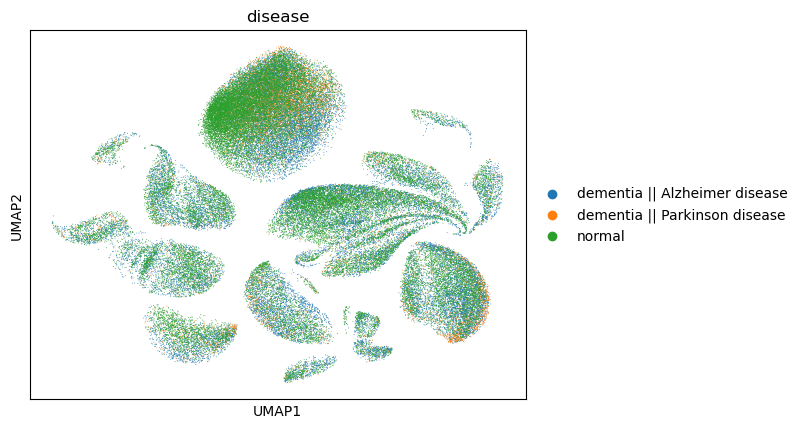

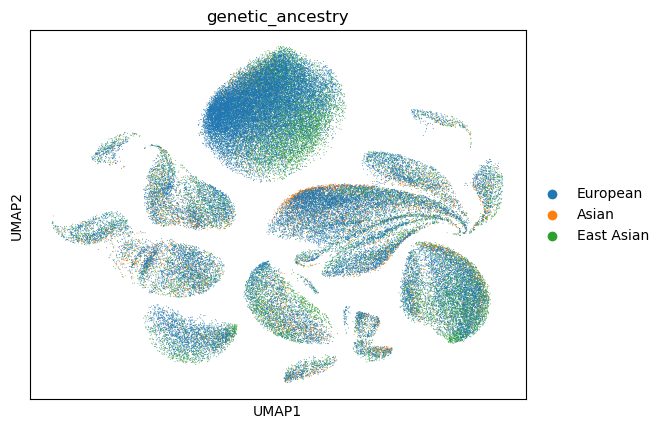

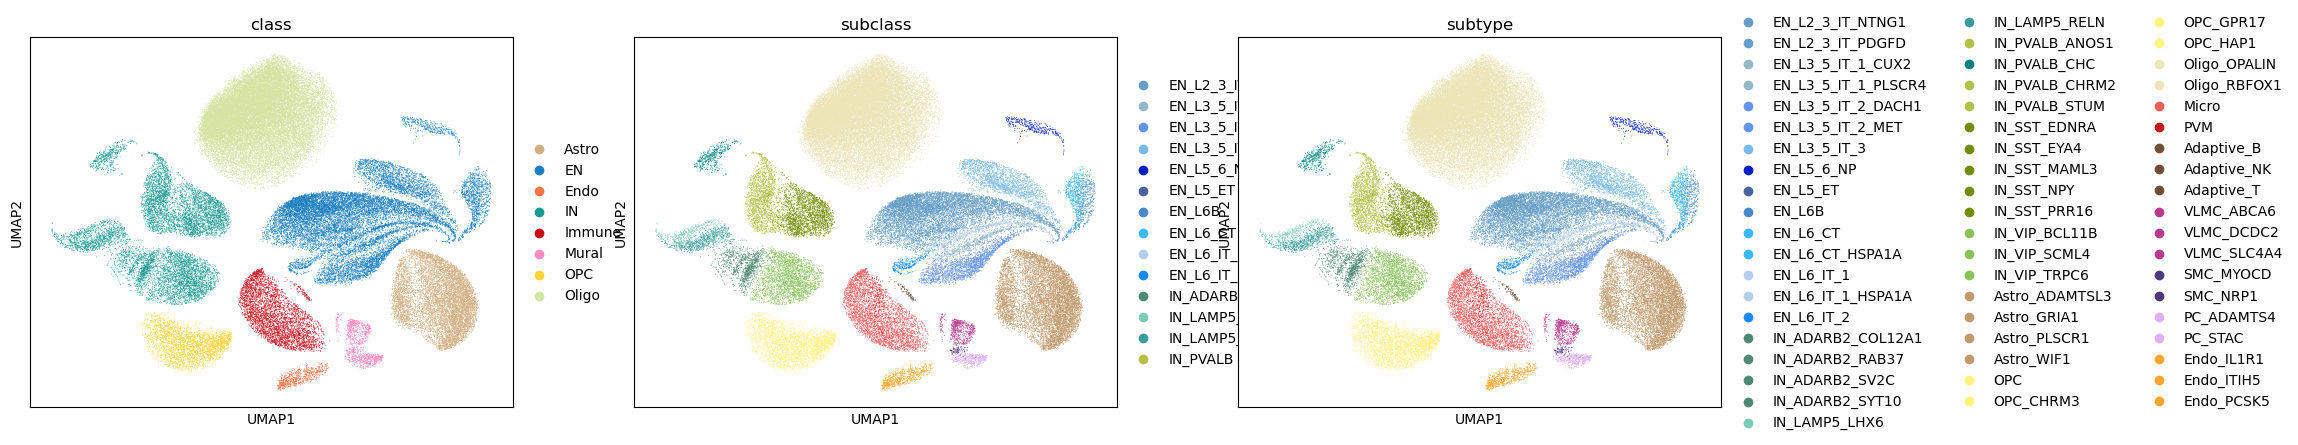

In [16]:
# sc.pl.umap(adata, color = 'cell_type')
sc.pl.umap(adata, color = 'disease')
sc.pl.umap(adata, color = 'genetic_ancestry')

# sc.pl.umap(adata, color = 'AD_status')
# sc.pl.umap(adata, color = 'sex')
# sc.pl.umap(adata, color = 'subclass')
# sc.pl.umap(adata, color = ['cell_type', 'subclass'])
sc.pl.umap(adata, color = ['class', 'subclass', 'subtype'])

# **RNAseq pipeline**

## 1. Quality Check

### a - Visualization of QC metrics

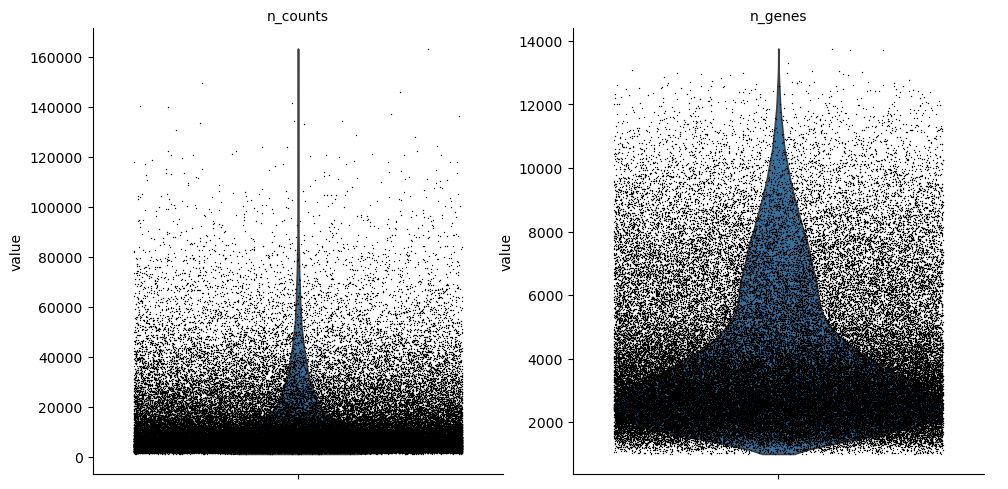

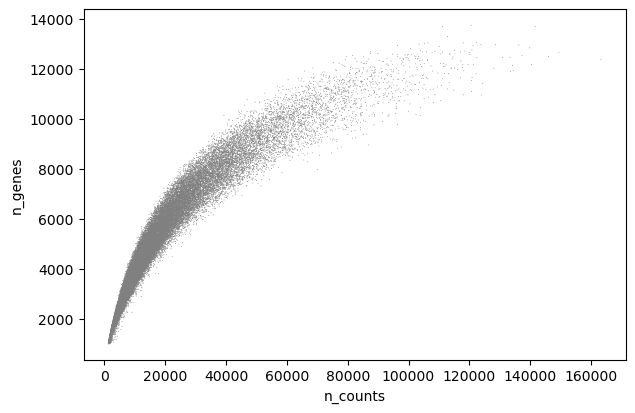

In [17]:
# 1. Calculation of QC metrics and addition to adata.obs
sc.pp.calculate_qc_metrics(adata, inplace = True)

# 2. Visualization of QC metrics before filtering
sc.pl.violin(
    adata, 
    ['n_counts', 'n_genes'], # Violin plot of number of genes and counts per cell
    jitter = 0.4,
    multi_panel = True
)

sc.pl.scatter(adata, x = 'n_counts', y = 'n_genes') # Scatter plot of number of genes vs. number of counts

### b - Filtering out low quality cells

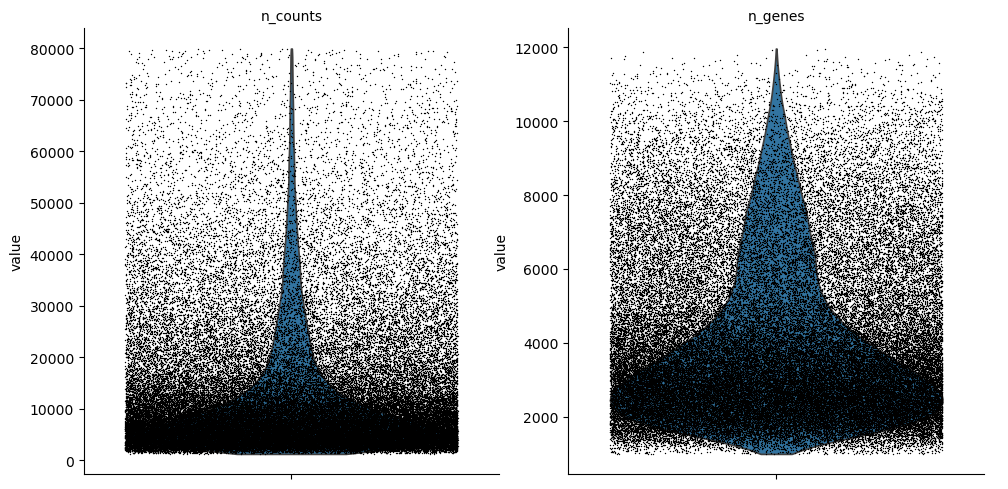

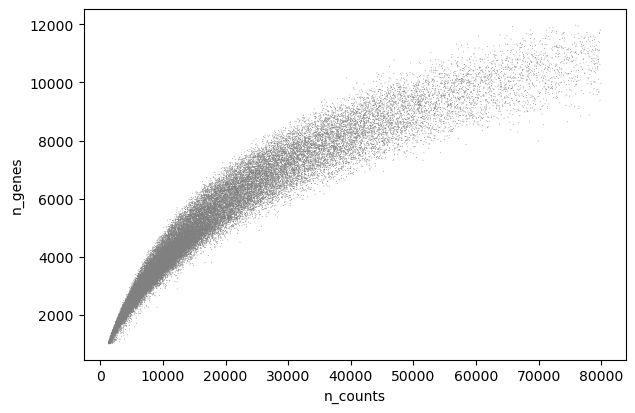

In [18]:
# 3. Application of filters
adata = adata[adata.obs['n_genes'] < 12000, :] # cutoff chosen: 12 000 genes

adata = adata[adata.obs['n_counts'] < 80000, :] # cutoff chosen: 80 000 counts

# 4. Visualization of QC metrics after filtering
sc.pl.violin(
    adata, 
    ['n_counts', 'n_genes'], # violin plot of number of genes and counts per cell
    jitter = 0.4,
    multi_panel = True
)

sc.pl.scatter(adata, x = 'n_counts', y = 'n_genes') # Scatter plot of number of genes vs. number of counts

### c - Filtering out mitochondrial genes

In [19]:
# Counting the number of mitochondrial genes
adata.var["mt"] = adata.var['gene_name'].str.startswith("MT-")

# Calculating QC metrics including the percentage of mitochondrial genes and adding them to adata.obs
sc.pp.calculate_qc_metrics(
    adata,
    qc_vars = ["mt"],
    inplace = True,
    log1p = True
)

/var/folders/k4/d0pwylgd1tl4mf2_hqnm6l400000gn/T/ipykernel_39999/4025084783.py:2: ImplicitModificationWarning: Trying to modify attribute `.var` of view, initializing view as actual.
  adata.var["mt"] = adata.var['gene_name'].str.startswith("MT-")


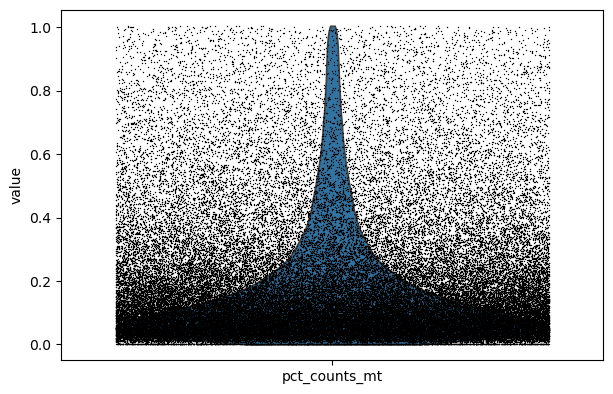

In [20]:
# Visualization of the percentage of mitochondrial genes
sc.pl.violin(
    adata,
    keys='pct_counts_mt',
    jitter = 0.4,
    rotation=  0,   
    stripplot = True,
    show = True
)

# data was already filtered on pct_counts_mt 
# it's weird because even before the filtering there was no cell with >10%. 
# They must have been filtered before
# I still keep the line just in case
# Filtering cells with more than 10% mitochondrial gene expression
adata_hvgadata = adata[adata.obs['pct_counts_mt'] < 10, :]


Here, we note that there were no cells with more than 10% mitochondrial gene expression in the dataset even before we applied our own filter. This means that the dataset did not contain such cells, either because of the nature of the data or because the dataset was already treated and filtered.

### d - Excluding ribosomal and hemoglobin genes
We will be keeping ribosomal genes, which make up 1.5% of genes expressed, and filtering out hemoglobin genes.

In [21]:
# 1m3s
# Ribosomal genes
adata.var["ribo"] = adata.var['gene_name'].str.startswith(("RPS", "RPL"))
print("proportion of ribo genes in all expressed genes : ", adata.var["ribo"].sum()/len(adata.var)*100)

# Hemoglobin genes
adata.var["hb"] = adata.var['gene_name'].str.contains("^HB[^(P)]")
print("Number of hemo genes before deletion : ", adata.var["hb"].sum())

# Confirming that hb genes were properly removed
genes_to_keep = ~adata.var["hb"]
adata = adata[:, genes_to_keep].copy()
print("Number of hemo genes after deletion: ", adata.var["hb"].sum())

proportion of ribo genes in all expressed genes :  1.5127574906367043
Number of hemo genes before deletion :  9
Number of hemo genes after deletion:  0


## 2. Normalization

this part was already performed, so we are not doing it again (How did they normalize?)

## 3. Highly Variable Genes (HVGs)

we kept 3000 highly variable genes out of 34167 genes


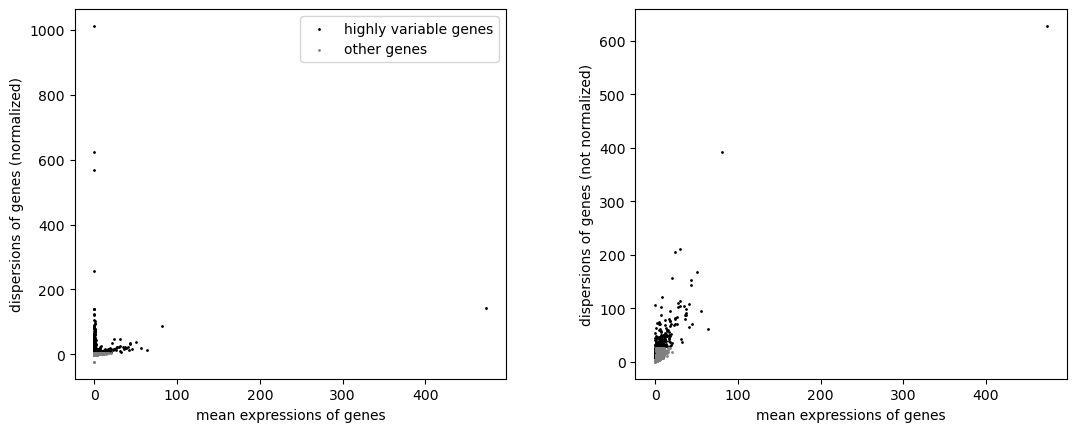

In [22]:
nHVG = 3000 

sc.pp.highly_variable_genes(
    adata, 
    flavor='cell_ranger',
    n_top_genes=nHVG
)

print("we kept", nHVG, "highly variable genes out of", adata.shape[1], "genes")
sc.pl.highly_variable_genes(adata)

alternative aux HVG : prendre les 3000 gènes les + exprimés

In [23]:
adata.var['highly_variable'].value_counts()

highly_variable
False    31167
True      3000
Name: count, dtype: int64

new AnnData object with the HVG only

In [24]:
adata_hvg = adata[:, adata.var['highly_variable']].copy()

## 4. Scaling & PCA

In [ ]:
# Scaling (3s)
sc.pp.scale(adata_hvg, max_value = 10)


/opt/anaconda3/envs/scanpy310/lib/python3.10/functools.py:889: UserWarning: zero-centering a sparse array/matrix densifies it.
  return dispatch(args[0].__class__)(*args, **kw)


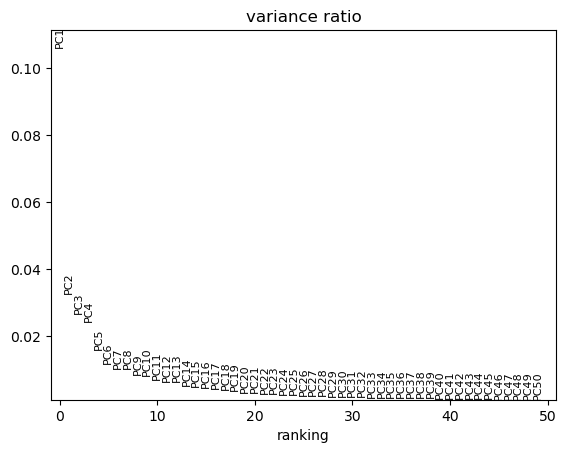

In [ ]:
# PCA (1min43)
sc.tl.pca(adata_hvg)

sc.pl.pca_variance_ratio(adata_hvg, n_pcs = 50) # elbow plot to see how many PCs to keep

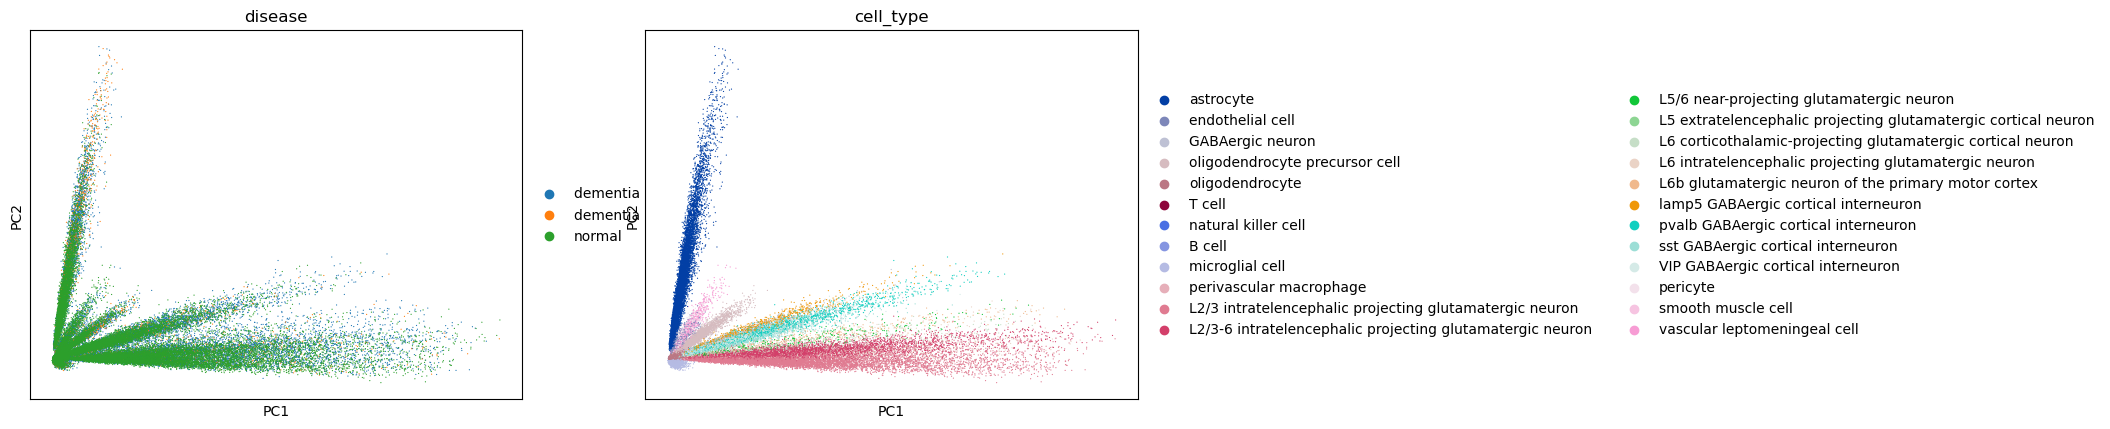

In [27]:
sc.pl.pca(
    adata_hvg,
    color = ["disease", "cell_type"],
    ncols = 3,
    size = 3,
)

## Batch effect correction??

In [ ]:
# 24sec
import bbknn
bbknn.bbknn(adata_hvg, batch_key='donor_id')

/opt/anaconda3/envs/scanpy310/lib/python3.10/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


## 5. Clustering

### Neighbors

In [29]:
# number of neighbors
# we chose 30 PCs because after that the variance ratio doesn't decrease that much
nPC = 30

sc.pp.neighbors(adata_hvg, n_pcs = nPC)

python(47666) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.


### Clustering

In [30]:
import igraph
import leidenalg

sc.tl.leiden(adata_hvg, resolution = 0.0007)

print("Number of clusters :", len(adata_hvg.obs['leiden'].cat.categories))

/var/folders/k4/d0pwylgd1tl4mf2_hqnm6l400000gn/T/ipykernel_39999/830700533.py:4: FutureWarning: In the future, the default backend for leiden will be igraph instead of leidenalg.

 To achieve the future defaults please pass: flavor="igraph" and n_iterations=2.  directed must also be False to work with igraph's implementation.
  sc.tl.leiden(adata_hvg, resolution = 0.0007)


Number of clusters : 6


### UMAP

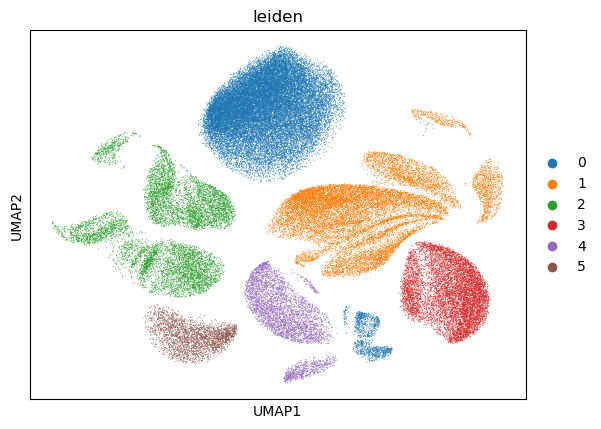

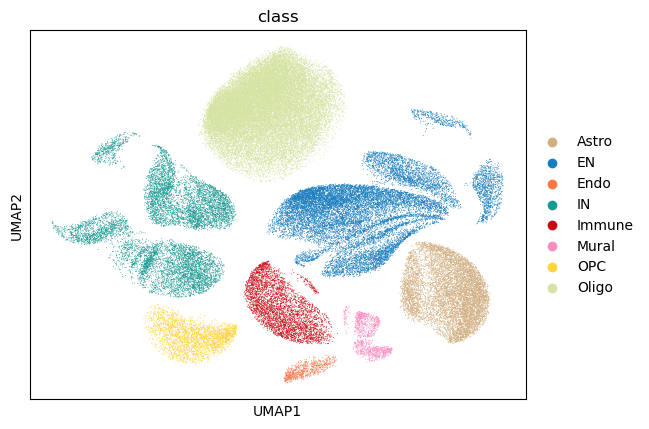

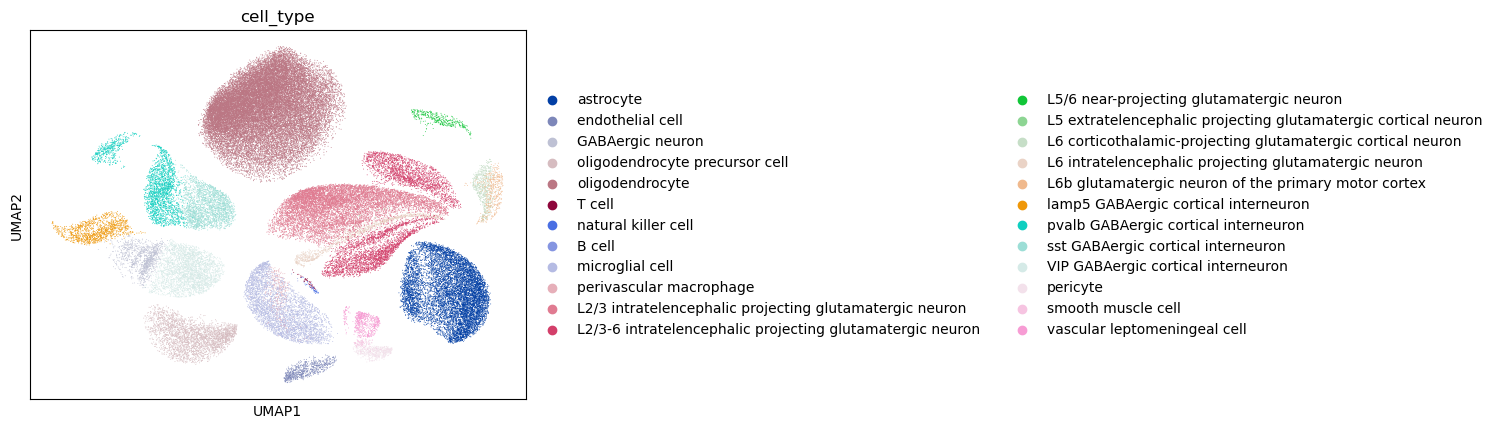

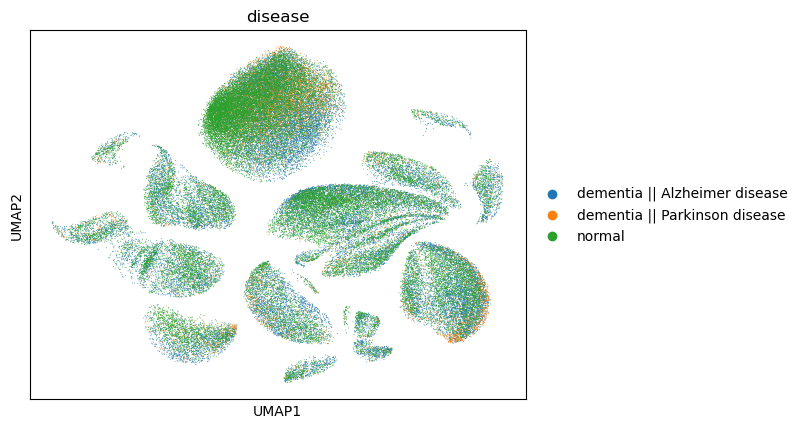

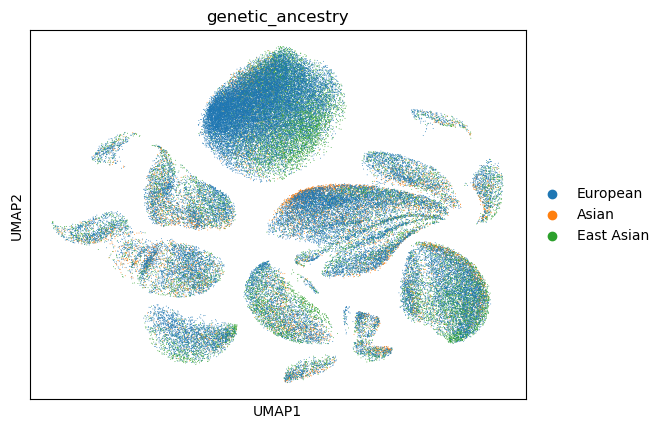

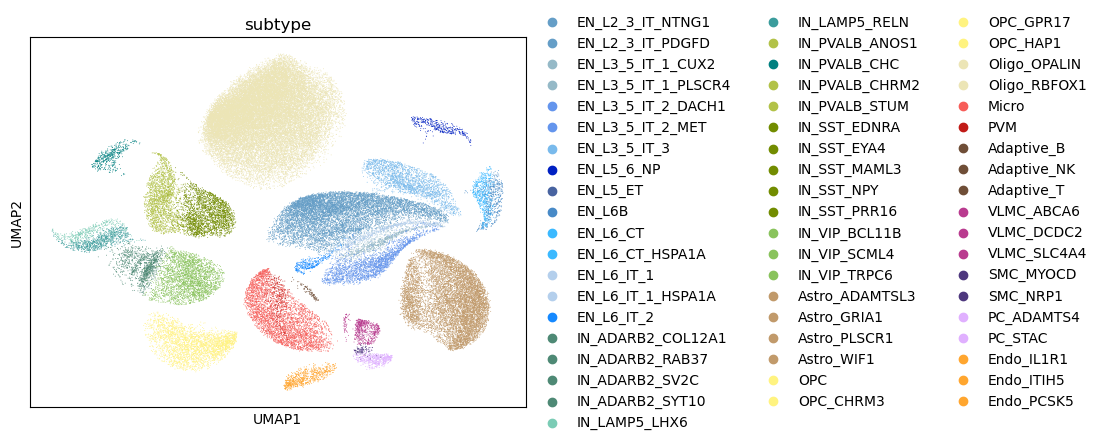

In [31]:
# UMAP

sc.pl.umap(adata_hvg, color="leiden")

sc.pl.umap(adata_hvg, color="class")

sc.pl.umap(adata_hvg, color='cell_type')

sc.pl.umap(adata_hvg, color="disease")
sc.pl.umap(adata_hvg, color="genetic_ancestry")

sc.pl.umap(adata_hvg, color='subtype')

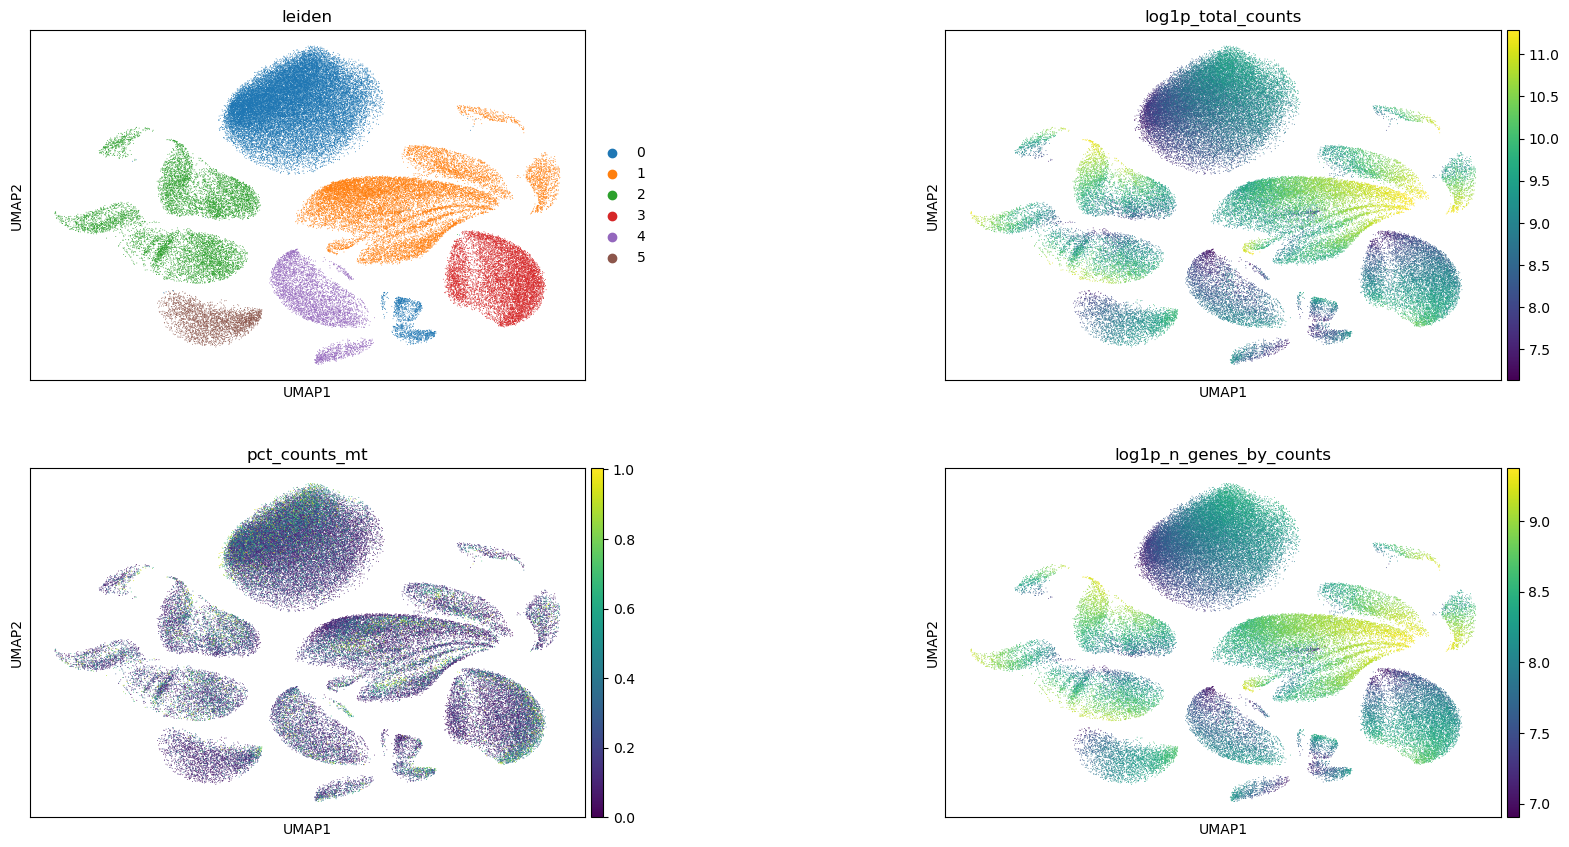

In [32]:
sc.pl.umap(
    adata_hvg,
    color = ["leiden", "log1p_total_counts", "pct_counts_mt", "log1p_n_genes_by_counts"],
    wspace = 0.5,
    ncols = 2,
)

## **6. Annotation**

### **6.1 Manual Annotation**

#### Marker gene set
We first define known marker genes of the cell types that we think are represented by the clusters. We only keep the genes in that list that are found in our data.

In [33]:
# Define marker genes for each cell type
marker_genes = {
    "Astro" : ["ENSG00000135821", "ENSG00000125398", "ENSG00000171885", "ENSG00000152661", "ENSG00000165795", "ENSG00000131095", "ENSG00000144908"],
    "Endo" : ["ENSG00000184113", "ENSG00000229515"],
    "Micro" : ["ENSG00000125730", "ENSG00000019582" ,"ENSG00000168329","ENSG00000182578", "ENSG00000173372"],
    "Oligo" : ["ENSG00000197971", "ENSG00000204655", "ENSG00000123560", "ENSG00000168314", "ENSG00000105695"],
    "OPC" : ["ENSG00000184221", "ENSG00000205927", "ENSG00000150275", "ENSG00000134853"],
    "EN" : ["ENSG00000070808", "ENSG00000154146", "ENSG00000119042", "ENSG00000104888"],
    "IN" : ["ENSG00000128683", "ENSG00000136750"],
    "Mural" : ["ENSG00000113721", "ENSG00000175084", "ENSG00000173546"]
    }

marker_genes

# Only keep the marker genes find in our data

marker_genes_in_data = {}
for ct, markers in marker_genes.items():
    markers_found = []
    for marker in markers:
        if marker in adata_hvg.var.index:
            markers_found.append(marker)
    marker_genes_in_data[ct] = markers_found

marker_genes_in_data
 

{'Astro': ['ENSG00000171885',
  'ENSG00000152661',
  'ENSG00000131095',
  'ENSG00000144908'],
 'Endo': ['ENSG00000184113'],
 'Micro': ['ENSG00000125730',
  'ENSG00000019582',
  'ENSG00000168329',
  'ENSG00000182578'],
 'Oligo': ['ENSG00000123560'],
 'OPC': ['ENSG00000150275', 'ENSG00000134853'],
 'EN': [],
 'IN': ['ENSG00000128683', 'ENSG00000136750'],
 'Mural': []}

Listing cell types we want to show the markers for:

In [34]:
cell_types = ["Astro", "Endo", "Micro", "Oligo", "OPC", "EN", "IN", "Mural"]
cell_types

['Astro', 'Endo', 'Micro', 'Oligo', 'OPC', 'EN', 'IN', 'Mural']

Plotting one UMAP per marker for each cell type:

ASTRO:


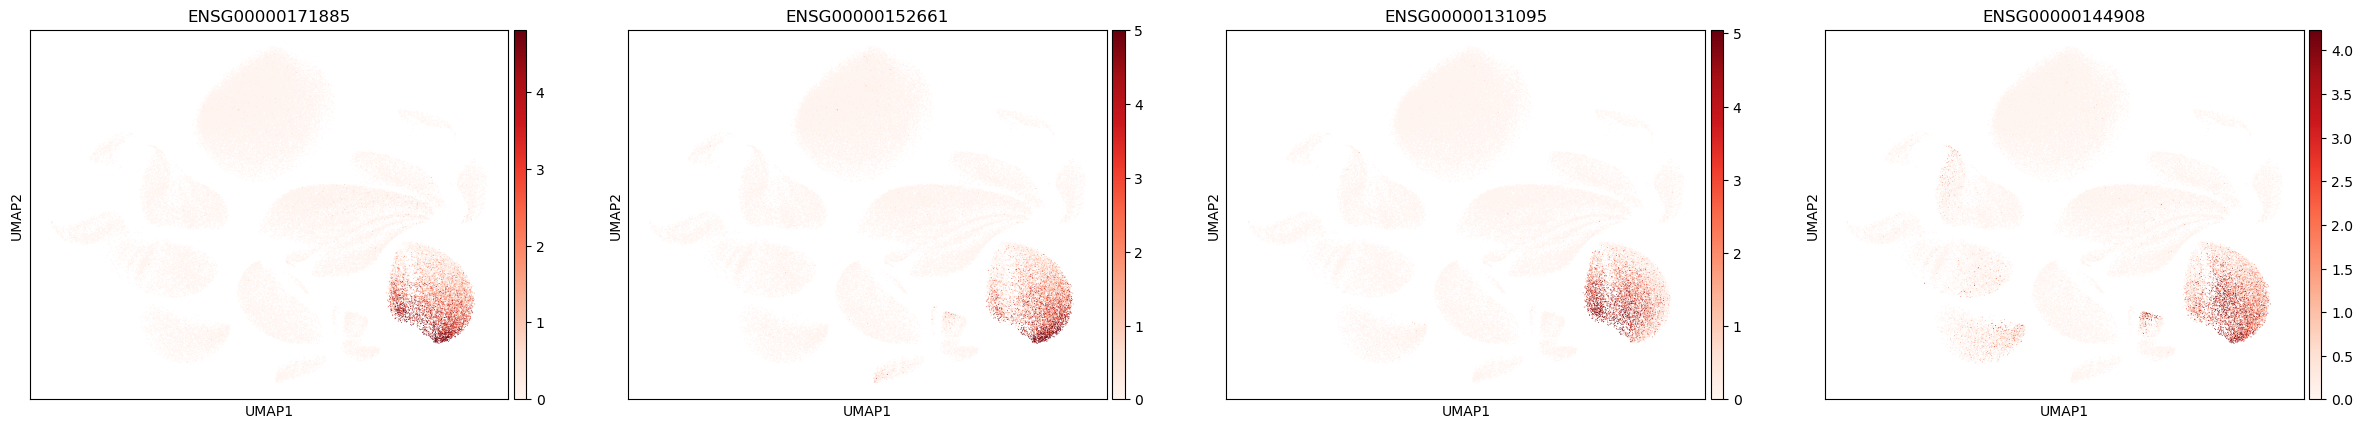





ENDO:


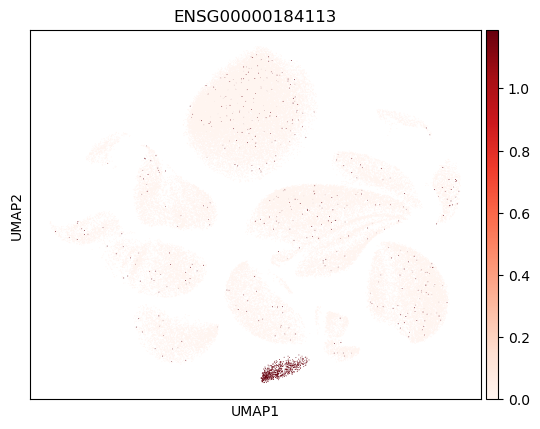





MICRO:


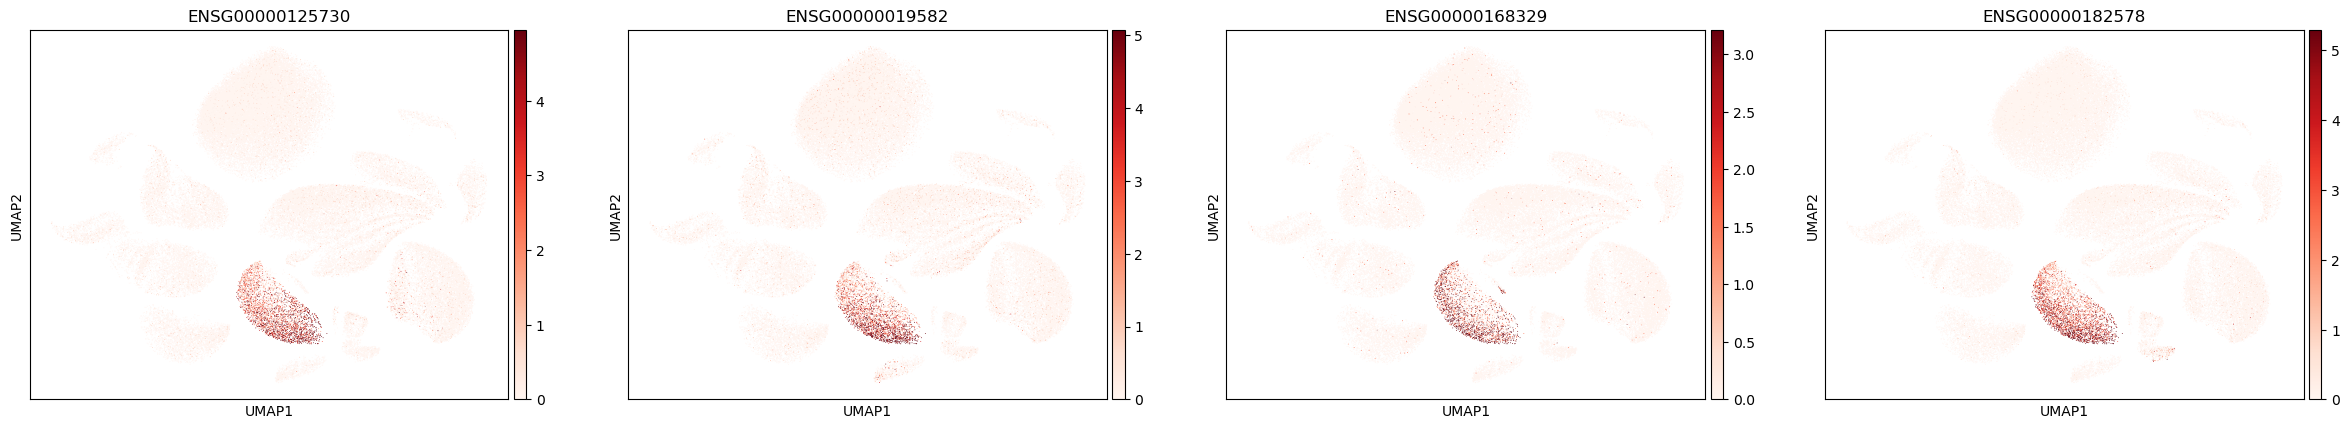





OLIGO:


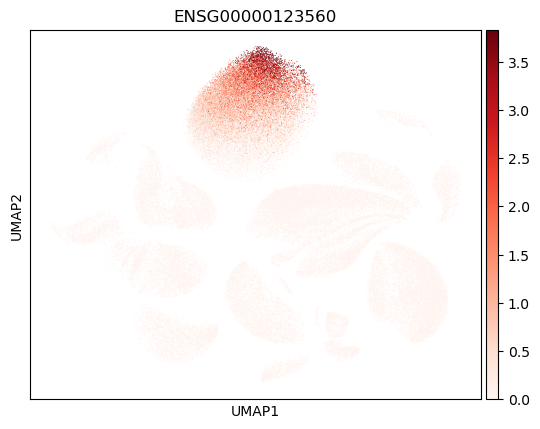





OPC:


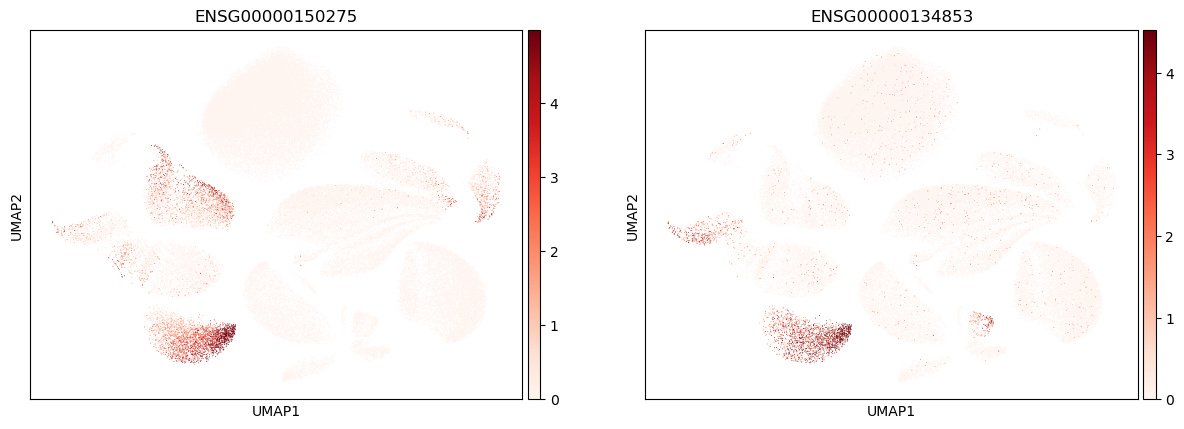





EN: No marker genes found in data.

IN:


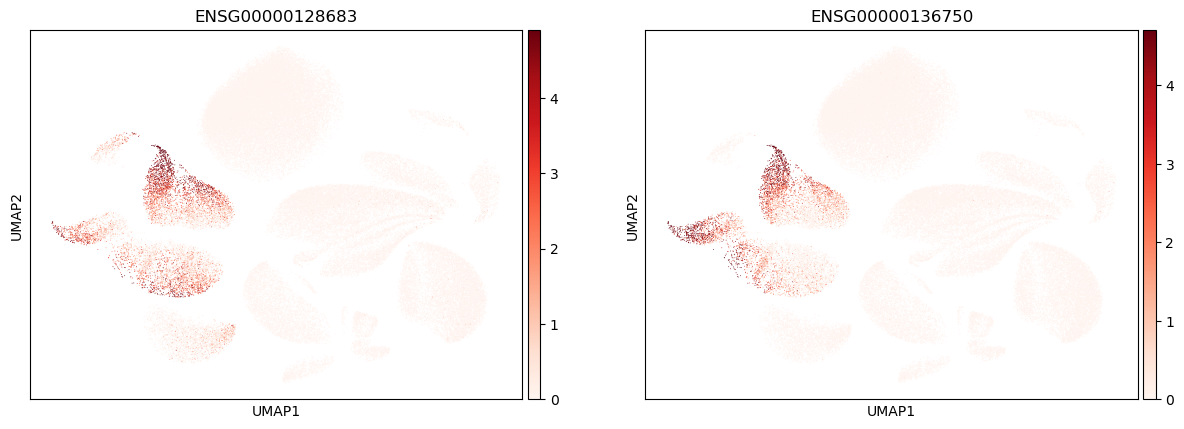





MURAL: No marker genes found in data.



In [35]:
for ct in cell_types:
    markers = marker_genes_in_data[ct]
    if not markers:  # Skip if the list is empty
        print(f"{ct.upper()}: No marker genes found in data.\n")
        continue
    
    print(f"{ct.upper()}:")  # print cell subtype name
    sc.pl.umap(
        adata_hvg,
        color = markers,
        vmin = 0,
        vmax = "p99",
        sort_order = False,
        cmap = "Reds",
    )
    
    print("\n\n\n")  # print white space for legibility

Dotplot visualization of marker gene expression per cluster:

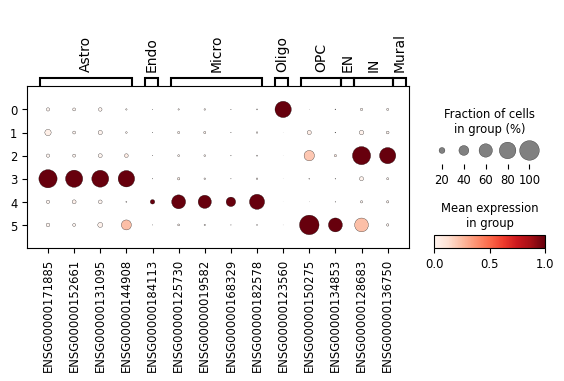

In [36]:
sc.pl.dotplot(
    adata_hvg,
    groupby = "leiden",
    var_names = marker_genes_in_data,
    standard_scale = "var",  # standard scale: normalize each gene to range from 0 to 1
)

Referring to both representations, we can manually annotate the clusters:

In [37]:
cl_annotation = {
    "0": "Oligo",
    "1": "EN",
    "2": "Astro", # and mural? 
    "3": "Micro",
    "4": "IN", 
    "5" : "IN", # need to find distinguishing markers from cluster 4
    "6" : "OPC",
    "7" : "Endo"
}

To visualize the annotations:

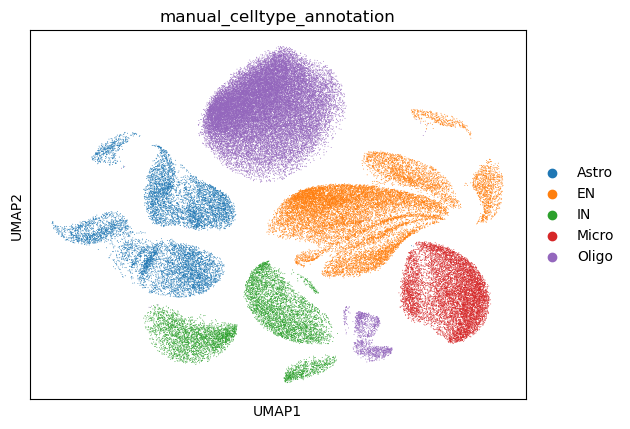

In [38]:
adata_hvg.obs["manual_celltype_annotation"] = adata_hvg.obs.leiden.map(cl_annotation)

sc.pl.umap(adata_hvg, color = ["manual_celltype_annotation"])

To confirm our annotations, we can find the differentially expressed genes for each cluster as compared to the others. We also want to use this to distinguish clusters 4 and 5.

/opt/anaconda3/envs/scanpy310/lib/python3.10/site-packages/scanpy/tools/_rank_genes_groups.py:484: RuntimeWarning: invalid value encountered in log2
  self.stats[group_name, "logfoldchanges"] = np.log2(
/opt/anaconda3/envs/scanpy310/lib/python3.10/site-packages/scanpy/tools/_rank_genes_groups.py:484: RuntimeWarning: invalid value encountered in log2
  self.stats[group_name, "logfoldchanges"] = np.log2(
/opt/anaconda3/envs/scanpy310/lib/python3.10/site-packages/scanpy/tools/_rank_genes_groups.py:484: RuntimeWarning: invalid value encountered in log2
  self.stats[group_name, "logfoldchanges"] = np.log2(
/opt/anaconda3/envs/scanpy310/lib/python3.10/site-packages/scanpy/tools/_rank_genes_groups.py:484: RuntimeWarning: invalid value encountered in log2
  self.stats[group_name, "logfoldchanges"] = np.log2(
/opt/anaconda3/envs/scanpy310/lib/python3.10/site-packages/scanpy/tools/_rank_genes_groups.py:484: RuntimeWarning: invalid value encountered in log2
  self.stats[group_name, "logfoldchange

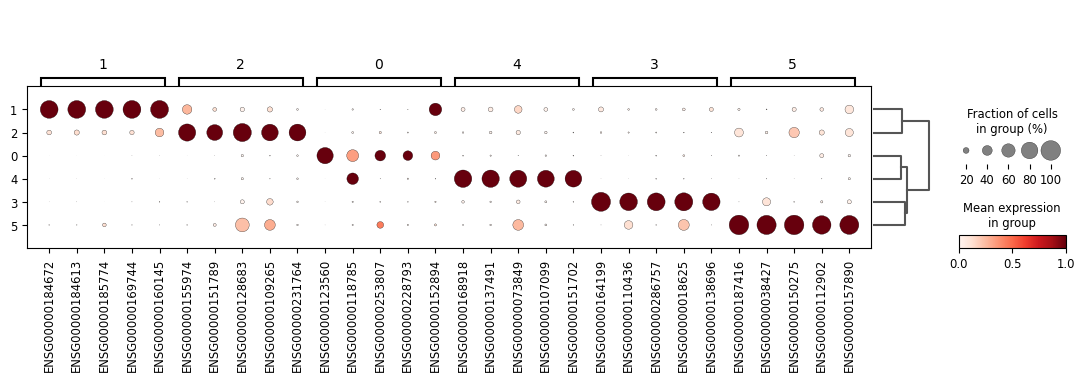

In [39]:
# Calculating differentially expressed genes for each cluster 
    ## We are using the rank_genes_groups function from scanpy for annotations, but for downstream analyses, we will do pseudo-bulk differential expression to avoid pseudoreplication issues

sc.tl.rank_genes_groups(
    adata_hvg, groupby = "leiden", method = "wilcoxon", key_added = "dea_leiden"
)

# Visualizing the expression of the 5 top DE genes per cluster (dotplot representation)
sc.pl.rank_genes_groups_dotplot(
    adata_hvg, groupby = "leiden", standard_scale = "var", n_genes = 5, key = "dea_leiden"
)

### **6.2 Automated Annotation**
We thought it would be interesting to attempt automated annotation of our clusters based on a wider set of genes, using CellTypist *[Conde et al, 2022]*.

In [40]:
import celltypist # Install the package if needed.
from celltypist import models, annotate

ModuleNotFoundError: No module named 'celltypist'

In [ ]:
# To make our data compatible with CellTypist:

adata_celltypist = adata_hvg.copy() 

sc.pp.normalize_total(
    adata_celltypist, target_sum=10**4
)  # normalize to 10,000 counts per cell

sc.pp.log1p(adata_celltypist)  # log-transform

In [ ]:
type(adata_celltypist.X)

adata_celltypist.X

array([[1.02699046, 1.5137388 , 1.73939782, ..., 1.04352626, 2.3495892 ,
        0.85653291],
       [       nan,        nan,        nan, ...,        nan,        nan,
               nan],
       [       nan,        nan,        nan, ...,        nan, 5.330607  ,
               nan],
       ...,
       [0.93280662, 1.39809483, 1.61674065, ..., 0.9484385 , 2.21415239,
        0.77253582],
       [0.92417593, 1.38737008, 1.60532079, ..., 0.93972061, 2.20145201,
        0.76488204],
       [1.10642797, 1.60945959, 1.84030871, ..., 1.12366214, 2.45979694,
        0.92802209]], shape=(20655, 3000))

To download the CellTypist model for the human prefrontal cortex:

In [ ]:
models.download_models(force_update = True, model = "Adult_Human_PrefrontalCortex.pkl")
celltypistmodel = models.Model.load(model = "Adult_Human_PrefrontalCortex.pkl")

celltypistmodel
celltypistmodel.cell_types
celltypistmodel.features


📜 Retrieving model list from server https://celltypist.cog.sanger.ac.uk/models/models.json
📚 Total models in list: 59
📂 Storing models in C:\Users\yarad\.celltypist\data\models
💾 Total models to download: 1
💾 Downloading model [1/1]: Adult_Human_PrefrontalCortex.pkl


array(['ISG15', 'GABRD', 'PRDM16', ..., 'BGN', 'SRPK3', 'GAB3'],
      shape=(4304,), dtype=object)

Convert Ensembl IDs to gene symbols in dataset to match Cell Typist model:

In [ ]:
pip install pybiomart

Note: you may need to restart the kernel to use updated packages.


To predict cell identities using the "Adult_Human_PrefrontalCortex" model:

In [ ]:
#predictions = celltypist.annotate(adata_celltypist, model = "Adult_Human_PrefrontalCortex.pkl", majority_voting = True)

🔬 Input data has 20655 cells and 3000 genes


🔗 Matching reference genes in the model


ValueError: 🛑 No features overlap with the model. Please provide gene symbols

## **7. Differential Gene Expression**

In [ ]:
cluster = "0"

adata_cluster = adata_hvg[adata_hvg.obs["leiden"] == cluster]

In [ ]:
sc.tl.rank_genes_groups(
    adata_cluster,
    groupby = "disease",
    groups = ["dementia || Alzheimer disease"],
    reference = "normal",
    method = "wilcoxon"
)

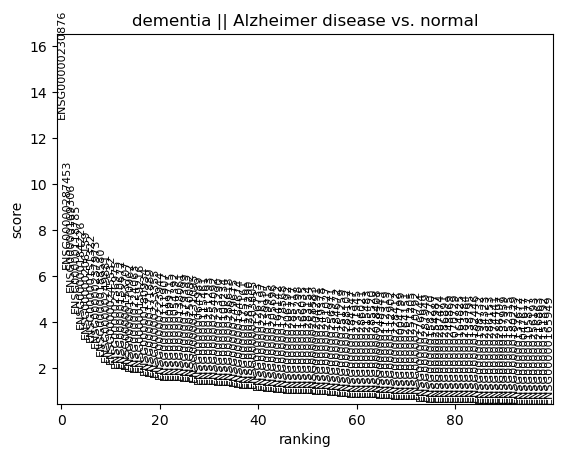

In [ ]:
sc.pl.rank_genes_groups(adata_cluster, n_genes=100)

### Pseudo-bulk Approach
We must first aggregate per donor

In [ ]:
#pb = adata.to_df().groupby(adata_hvg.obs["donor_id"]).sum()

In [ ]:
#pip install anndata2ri
#import anndata2ri

#import random
#import pertpy 
#import rpy2.rinterface_lib.callbacks
#import sc_toolbox
#from rpy2.robjects import pandas2ri, conversion
#import anndata2ri

#sc.settings.verbosity = 0

#import logging
#rpy2.rinterface_lib.callbacks.logger.setLevel(logging.ERROR) #silences rpy2 warnings

# Combining converters
#converter = conversion.Converter("pandas-anndata") + pandas2ri.converter + anndata2ri.converter

# Loading R magic
#%load_ext rpy2.ipython

#import rpy2.ipython.rmagic
#rpy2.ipython.rmagic.Converter = converter

The rpy2.ipython extension is already loaded. To reload it, use:
  %reload_ext rpy2.ipython


In [ ]:
#%%R

#if (!require("BiocManager", quietly = TRUE))
#    install.packages("BiocManager")

#BiocManager::install("edgeR", ask = FALSE, update = TRUE)

#library(edgeR)


  There are binary versions available but the source versions are later:
                   binary   source needs_compilation
digest             0.6.38   0.6.39              TRUE
future             1.67.0   1.68.0             FALSE
RcppArmadillo    15.0.2-2 15.2.2-1              TRUE
Rgraphviz          2.53.0   2.54.0              TRUE
spatstat.explore    3.5-3    3.6-0              TRUE
spatstat.geom       3.6-0    3.6-1              TRUE
spatstat.random     3.4-2    3.4-3              TRUE
spatstat.univar     3.1-4    3.1-5              TRUE
tinytex              0.57     0.58             FALSE

package 'KEGGREST' successfully unpacked and MD5 sums checked
package 'Seqinfo' successfully unpacked and MD5 sums checked
package 'AnnotationDbi' successfully unpacked and MD5 sums checked
package 'Biobase' successfully unpacked and MD5 sums checked
package 'BiocParallel' successfully unpacked and MD5 sums checked
package 'Biostrings' successfully unpacked and MD5 sums checked
package 'fgsea

Bioconductor version 3.22 (BiocManager 1.30.26), R 4.5.2 (2025-10-31 ucrt)
Installation paths not writeable, unable to update packages
  path: C:/Program Files/R/R-4.5.2/library
  packages:
    mgcv
Old packages: 'Biobase', 'BiocManager', 'BiocParallel', 'Biostrings', 'digest',
  'fgsea', 'future', 'ggplot2', 'GOSemSim', 'graph', 'IRanges', 'purrr',
  'RcppArmadillo', 'reshape2', 'reticulate', 'Rgraphviz', 'RSQLite',
  'S4Vectors', 'S7', 'spatstat.explore', 'spatstat.geom', 'spatstat.random',
  'spatstat.univar', 'tinytex', 'uwot', 'XML', 'XVector'
also installing the dependencies 'KEGGREST', 'Seqinfo', 'AnnotationDbi', 'GO.db'

trying URL 'https://bioconductor.org/packages/3.22/bioc/bin/windows/contrib/4.5/KEGGREST_1.50.0.zip'
trying URL 'https://bioconductor.org/packages/3.22/bioc/bin/windows/contrib/4.5/Seqinfo_1.0.0.zip'
trying URL 'https://bioconductor.org/packages/3.22/bioc/bin/windows/contrib/4.5/AnnotationDbi_1.72.0.zip'
trying URL 'https://bioconductor.org/packages/3.22/bioc/b

We need to work with the raw counts, which are not available in the dataset??

In [ ]:
#np.max(adata.X) # checking that X contains raw counts
#adata.layers["counts"] = adata.X.copy()

np.float32(3850.0)

In [ ]:
%%R

if (!require("BiocManager", quietly = TRUE))
    install.packages("BiocManager")

BiocManager::install("MAST", ask = FALSE, update = TRUE)

library(MAST)


  There is a binary version available but the source version is later:
            binary source needs_compilation
SparseArray 1.10.2 1.10.3              TRUE

